<a href="https://colab.research.google.com/github/jotadram6/EACD-02-ESTADISTICA/blob/master/Sesi%C3%B3n_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Curso Estadística y Análisis exploratorio
Profesor: José David Ruiz Álvarez

Correo: josed.ruiz@udea.edu.co

## Sesión 2

### Test estadísticos:


1.   Distribuciones notables
2.   Funciones de variables aleatorias
3.   Covarianza
4.   Propagación de errores
5.   Test estadísticos
6.   Test de $\chi^{2}$
7.   Verosimilitud


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Distribuciones notables
## Binomial: 

$$f(n;N,p) = \frac{N!}{n!(N-n)!}p^{n}(1-p)^{N-n}$$

n intentos exitosos, N intentos totales, p probabilidad de acierto.

## Poisson

$$f(n;\nu)=\frac{\nu^{n}}{n!}e^{-\nu}$$

n observaciones de $\nu$ espearados. 

## Uniforme

$$f(x;\alpha,\beta)=
\left\{
	\begin{array}{ll}
		\frac{1}{\beta-\alpha}  & \mbox{si } \alpha \leq x \leq \beta \\
		0 & \mbox{si } x < \alpha\; ;\; x > \beta
	\end{array}
\right. $$

$\alpha$ límite inferior y $\beta$ límite superior.

## Exponencial

$$f(x;\tau)=\frac{1}{\tau}e^{-x/\tau}$$

## Gaussiana

$$f(x;\mu,\sigma)=\frac{1}{\sqrt{2\pi\sigma^{2}}}e^{-\frac{(x-\mu)^{2}}{2\sigma^{2}}}$$

## Chi cuadrado

$$f(z;n)=\frac{1}{2^{n/2}\Gamma(n/2)}z^{n/2-1}e^{-z/2}$$

n grados de libertad.

### Ejemplo con distribución uniforme

In [ ]:
Uniforme = np.random.uniform(0,100,100000)

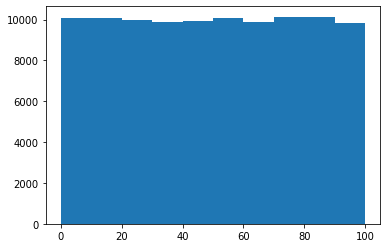

In [ ]:
HistoUniforme = plt.hist(Uniforme)

In [ ]:
def SomeStats(MyArray,PrintIt=False):
  Mediana=np.median(MyArray)
  Media=np.mean(MyArray)
  Varianza=np.var(MyArray)
  STD=np.std(MyArray)
  if PrintIt:
    print("Mediana=", Mediana)
    print("Media=", Media)
    print("Varianza=", Varianza, "Raíz cuadrada de la varianza=", np.sqrt(Varianza))
    print("Desviación estándar", STD)
  return Mediana,Media,Varianza,STD

In [ ]:
SomeStats(Uniforme,PrintIt=True)

Mediana= 50.06508309396547
Media= 49.96962838545906
Varianza= 834.3264608783486 Raíz cuadrada de la varianza= 28.884709811219302
Desviación estándar 28.884709811219302


(50.06508309396547, 49.96962838545906, 834.3264608783486, 28.884709811219302)

In [ ]:
#Ejemplo de muestreo
Sample1 = np.random.uniform(0,100,100)
Sample2 = np.random.uniform(0,100,1000)
Sample3 = np.random.uniform(0,100,10000)
Sample4 = np.random.uniform(0,100,100000)
Sample5 = np.random.uniform(0,100,1000000)

In [ ]:
Medias=[SomeStats(Sample1)[1],
        SomeStats(Sample2)[1],
        SomeStats(Sample3)[1],
        SomeStats(Sample4)[1],
        SomeStats(Sample5)[1]]
DesvStds=[SomeStats(Sample1)[3],
          SomeStats(Sample2)[3],
          SomeStats(Sample3)[3],
          SomeStats(Sample4)[3],
          SomeStats(Sample5)[3]]

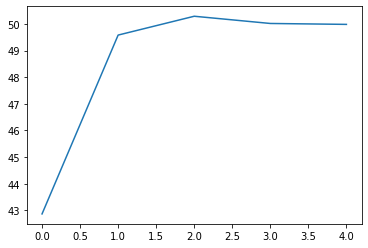

In [ ]:
plt.plot(Medias)

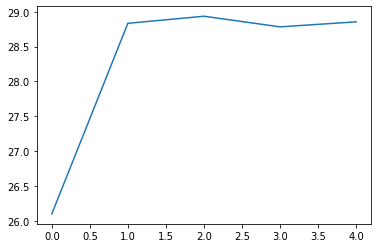

In [ ]:
plt.plot(DesvStds)

### Otros ejemplos: Exponencial, chi2, normal, poisson

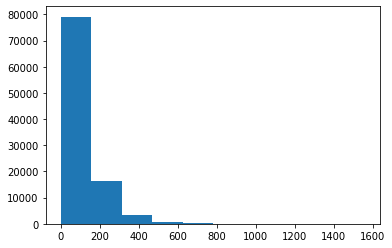

In [ ]:
Expo = np.random.exponential(100,100000)
HistoExpo = plt.hist(Expo)

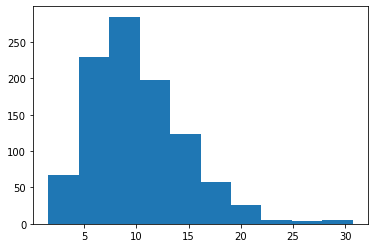

In [ ]:
Chi2 = np.random.chisquare(10,1000)
HistoChi2 = plt.hist(Chi2)

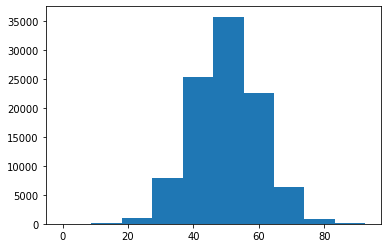

In [ ]:
Norm = np.random.normal(50,10,100000)
HistoNorm = plt.hist(Norm)

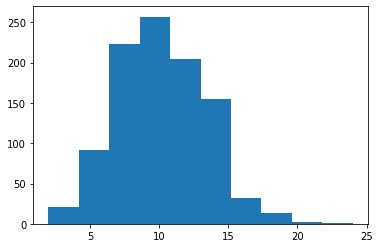

In [ ]:
Poi = np.random.poisson(10,1000)
HistoPoi = plt.hist(Poi)

## Ejercicio 1

Utilice el ejemplo de muestreo para encontrar la mediana, media y varianza de las distribuciones:

1. Exponencial: $\tau=100$
2. Chi2: $n=8$
3. Normal: $\mu=50$, $\sigma=15$
4. Poisson: $\nu=123$

### Teorema del límite central
La suma de n variables aleatorias independientes $x_{i}$ con $\sigma_{i}^{2}$ y $\mu_{i}$ es una variable aleatoria de distribución normal.

## Ejercicio 2

Tome n = 10, 20, 100, 200 variables aleatorias. Todas ellas distribuidas con una distribución distinta a la normal. Demuestre que la suma de todas ellas para cada n se ajusta al teorema del límite central.

## Funciones de variables aleatorias

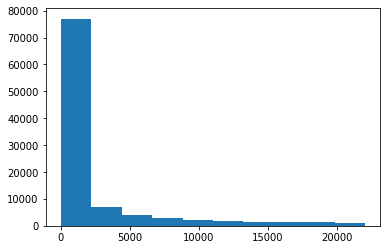

In [ ]:
Uni = np.random.uniform(0,10,100000)
HistoExpdeUni = plt.hist(np.exp(Uni))

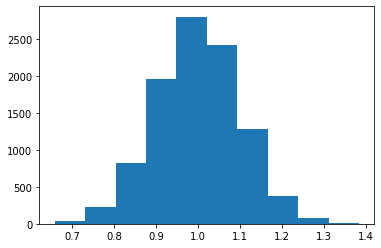

In [ ]:
Norm1 = np.random.normal(1,0.1,10000)
HistoExpdeNorm = plt.hist(Norm1)

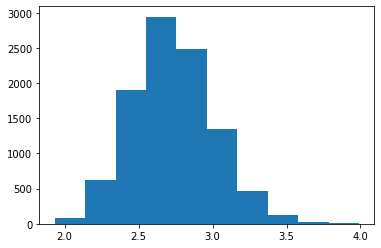

In [ ]:
HistoExpdeNorm = plt.hist(np.exp(Norm1))

## Ejercicio 3

Utilice el ejemplo de muestreo para encontrar la media y varianza de la exponencial de una variable distribuída de forma uniforme, como en la celda anterior.

## Covarianza

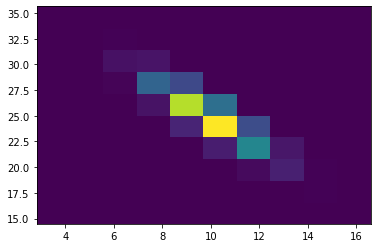

In [ ]:
mean = (10, 25)
cov = [[2, -3], [-3, 5]]
Norm2D = np.random.multivariate_normal(mean, cov, 1000000)
HistoNorm = plt.hist2d(Norm2D.take(indices=0,axis=1),Norm2D.take(indices=1,axis=1))

In [ ]:
Norm2D

array([[10.10825812, 24.50585781],
       [ 9.71517683, 23.41088226],
       [10.28900234, 24.68452222],
       ...,
       [10.12256655, 26.38153366],
       [10.23495789, 23.12253789],
       [ 9.96656244, 27.94807019]])

In [ ]:
Norm2D.take(indices=0,axis=1)

array([10.10825812,  9.71517683, 10.28900234, ..., 10.12256655,
       10.23495789,  9.96656244])

In [ ]:
Norm2D.take(indices=1,axis=1)

array([24.50585781, 23.41088226, 24.68452222, ..., 26.38153366,
       23.12253789, 27.94807019])

#Test de $\chi^{2}$ de Pearson

Si tenemos un histograma de n bines:
$$\chi^{2}=\sum_{i=1}^{n}\frac{(N_{i}-\nu_{i})^{2}}{\nu_{i}}$$

Con $N_{i}$ cuentas obserb=vadas y $\nu_{i}$ esperadas en el bin i.

Si se tienen n datos no bineados:
$$\chi^{2}=\sum_{i=1}^{n}\frac{(O_{i}-\nu_{i})^{2}}{\nu_{i}}$$

con $O_{i}$ y $\nu_{i}$ el valor i observado y esperado respectivamente. 

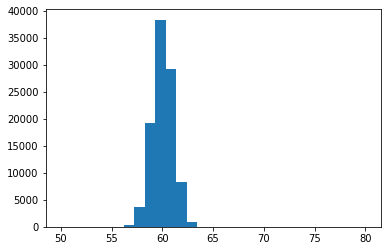

In [ ]:
Media=np.random.uniform(60,70)
STD=1
Nbins=np.linspace(50,80,30)
GaussianaRandom = np.random.normal(Media,STD,100000)
HistoGaussRandom = plt.hist(GaussianaRandom,bins=Nbins)

In [ ]:
def chi2test(Obs,Exp):
  if len(Obs)!=len(Exp):
    print("El histograma observado como esperado deben tener la misma cantidad de bines")
    return
  Chi2=0.
  for i in range(len(Obs)):
    if Exp[i]==0.0: continue
    Chi2+=((Obs[i]-Exp[i])**2)/Exp[i]
  return Chi2

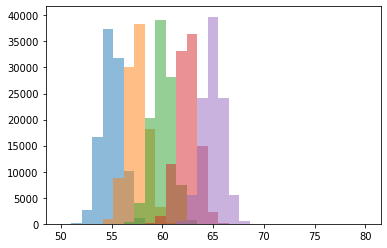

In [ ]:
HipotesisMean=np.linspace(55,65,5)
MuestrasHipotesis=[]
HistogramasHipotesis=[]
for i in range(len(HipotesisMean)):
  MuestrasHipotesis.append(np.random.normal(HipotesisMean[i],STD,100000))
  HistogramasHipotesis.append(plt.hist(MuestrasHipotesis[-1],bins=Nbins, alpha = 0.5)[0])

In [ ]:
AnalizandoChi2=[]
for i in range(len(HipotesisMean)):
  AnalizandoChi2.append(chi2test(HistoGaussRandom[0],HistogramasHipotesis[i]))

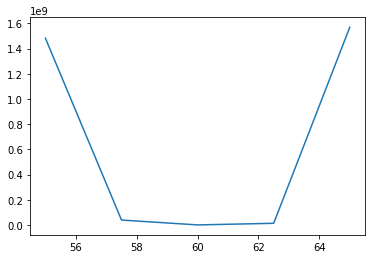

In [ ]:
plt.plot(HipotesisMean,np.array(AnalizandoChi2))

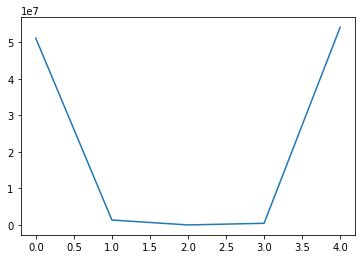

In [ ]:
plt.plot(np.array(AnalizandoChi2)/(len(Nbins)-1))

##Parametrización explícita

Podemos escribir el $\chi^{2}$ como función de parámetros:
$$\chi^{2}(\vec{\theta})=\sum_{i=1}^{n}\frac{(N_{i}-\nu_{i}(\vec{\theta}))^{2}}{\nu_{i}(\vec{\theta})}$$

Con $\vec{\theta}=(\theta_{1},\theta_{2},\ldots,\theta_{m})$ los m parámetros necesarios para determinar completamente una prdeicción.

Por ejemplo, en el caso de una gaussiana se necesitan dos parámetros funcionales la media $\mu$ y la desviación estándar $\sigma$

## Ejercicio 4
1. Siguiendo el ejemplo dado encuentre la media que minimiza el $\chi^{2}$.
2. Basándose en el ejemplo, haga el caso para una distribución exponencial. Genere aleatoriamente el parámetro $\tau$ y por medio del método de minimización de $\chi^{2}$ encuentre dicho parámetro.
3. Repita el ejemplo de la Gaussiana generada aleatoriamente pero ahora genere también de forma aleatoria la desviación estándar. Haga un scan en dos dimensiones para encontrar de forma simultánea la desviación estándar y la media.

#Función de Verosimilitud (Likelihood)

Si tenemos n realizaciones (datos) de una variable aleatoria x:
$$L(\vec{\theta})=\prod_{i=1}^{n}f(x_{i};\vec{\theta})$$

o podemos sacar el logaritmo para un manejo numérico más conveniente:
$$lnL(\vec{\theta})=\sum_{i=1}^{n}lnf(x_{i};\vec{\theta})$$

La hipótesis con que describimos el fenómeno, materializada en la pdf utilizada, maximiza la verosimilitud a medida que mejor describe los datos.

In [5]:
def GaussianFunc(x,mu,sigma):
  return (1./np.sqrt(2*np.pi*sigma**2))*(np.exp(-1*((x-mu)**2)/(2*sigma**2)))

In [6]:
def LnLikeTest(X,mu,sigma):
  LnLike=0.
  for i in range(len(X)):
    LnLike+=np.log(GaussianFunc(X[i],mu,sigma))
  return LnLike

In [7]:
Media=np.random.uniform(60,70)
STD=1
GaussianaRandom = np.random.normal(Media,STD,100)

In [14]:
HipotesisMean=np.linspace(55,65,10)
LnLikeHipotesis=[]
for i in range(len(HipotesisMean)):
  LnLikeHipotesis.append(LnLikeTest(GaussianaRandom,HipotesisMean[i],STD))

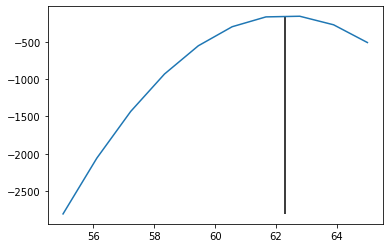

In [15]:
plt.plot(HipotesisMean,LnLikeHipotesis)
plt.vlines(Media,min(LnLikeHipotesis),max(LnLikeHipotesis))

## Ejercicio 5
1. Vectorice el procedimiento realizado para calcular el $ln(L)$.
2. Basándose en el ejemplo, generalícelo para la estimación simultánea de la media y la desviación estándar de la guassiana.